#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Assignment template: Covid data

## Student Note
This template can be used to better understand the suggested workflow and how to approach the questions. You are welcome to add code and markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]`
- You should submit a zipped folder containing all the elements used in your notebook (data files, images, etc)

> ***Markdown notes:*** Remember to change cell types to `Markdown` and take a look here: [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to add formatted text, links and images to your markdown documents.

### 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

#### 1.1) Report/notebook expectations:
- Demonstrate your GitHub setup consisting of the load and push updates of all the Jupyter Notebook files. (**Hint**: Make sure that your github username, the directory structure and updates are visible in the screenshot. Make sure to provide a zipped copy of the folder containing your submission notebook as well as supporting files such as images used in the notebook.)

#### Required: Report submission:
Insert URL to your public GitHub repository and a screenshot (double click cell to edit)
- [My Github Repo](https://github.com/mhbilas/LSE_DA_COVID_analysis)
- Screenshot demo (replace with your own)

See screenshot included in submission file

#### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as Github can be used to add value to organisations.

- Facilitates work in teams
- Version control: allows you and other team members to unro or roll back changes without causing any issues
- Ideal for collaborating with others and establishing a clear and reversible change history
- Tried and trusted place for housing code, controlling changes over time, learning from and with others, and building a portfolio of work
- Repo helps to keep work organised
- Sandbox allows you to experiment and learn from your mistakes
- Hosting explorations helps you improve your skills faster by getting valuable feedback from others
- Build and maintain a knowledge bank of code, projects, and programs
- Popular and respected way to share and showcase work with colleagues and potential employers as part of your portfolio

### 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

#### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

# Assignment 2 key observations:

- There are missing values in the covid_19_uk_cases data set in the columns: Deaths, Cases, Recovered, and Hospitalised
- There are no missing values int he covid_19_uk_vaccinated data set
- Both data sets contain common columns: Province/State, Country/Region, Lat, Long, ISO codes, Sub-region Name, and Intermediate Region Code. 
- The cases data set contains information on Deaths, Cases, Recovered, and Hospitalised while the vaccinated data set contains information on Vaccinated, First Dose, and Second Dose.

- Overall behaviour over time:
    - Deaths: Deaths have peaked and seem to be stable now
    - Cases: Cases rose, stabilised, and seem to be rising again 
    - Recovered: Recoveries reached a peak and then a steep decline
    - Hospitalised: There are three peaks of note. The largest peak seems to have been reached already.
    - Vaccinations:There are sharp daily fluctuations but an overall high peak with lower numbers of vaccinations now
    - First Dose/Second Dose: There is a peak in first doses followed by a sharp decline. During the deline in first doses, there is a peak in second doses.
- Gibralatar behaviour over time: Gibralatar roughly follows similar patterns as the overall UK data but with sharper peaks in deaths and cases.

# Load the covid cases and vaccine data sets as cov and vac respectively

In [2]:
cov = pd.read_csv("covid_19_uk_cases.csv")
vac = pd.read_csv("covid_19_uk_vaccinated.csv")

# Explore the DataFrames with the appropriate functions

In [3]:
# Explore the cov data set - rows and columns
print(cov.shape)

(7584, 12)


In [4]:
# Explore the cov data set - variable info
print(cov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB
None


In [5]:
# Explore the cov data set - values
print(cov.value_counts())

Province/State            Country/Region  Lat        Long        ISO 3166-1 Alpha 3-Codes  Sub-region Name                  Intermediate Region Code  Date        Deaths  Cases   Recovered  Hospitalised
Anguilla                  United Kingdom  18.220600  -63.068600  AIA                       Latin America and the Caribbean  29                        2020-01-22  0.0     0.0     0.0        0.0             1
Isle of Man               United Kingdom  54.236100  -4.548100   IMN                       Northern Europe                  0                         2021-10-11  54.0    8121.0  0.0        631.0           1
Montserrat                United Kingdom  16.742498  -62.187366  MSR                       Latin America and the Caribbean  29                        2020-01-30  0.0     0.0     0.0        0.0             1
                                                                                                                                                      2020-01-29  0.0     0.0    

In [6]:
# Explore the cov data set - statistics
print(cov.describe())

               Lat         Long  Intermediate Region Code         Deaths  \
count  7584.000000  7584.000000               7584.000000    7582.000000   
mean     21.840267   -41.440047                 12.500000    6210.202321   
std      28.305518    30.527529                 14.009849   24860.790148   
min     -51.796300   -81.254600                  0.000000       0.000000   
25%      17.851075   -64.667625                  0.000000       0.000000   
50%      20.503650   -60.855483                  2.500000       1.000000   
75%      39.448675    -5.152225                 29.000000      25.000000   
max      55.378100    -2.364400                 29.000000  138237.000000   

              Cases    Recovered  Hospitalised  
count  7.582000e+03  7582.000000   7582.000000  
mean   2.147082e+05   454.691242    685.228568  
std    1.007557e+06  1010.642337    819.256635  
min    0.000000e+00     0.000000      0.000000  
25%    1.200000e+01     0.000000    105.000000  
50%    1.685000e+02  

In [7]:
# Explore the cov data set - rows and columns
print(vac.shape)

(7584, 11)


In [8]:
# Explore the cov data set - variable info
print(vac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB
None


In [9]:
# Explore the cov data set - values
print(vac.value_counts())

Province/State            Country/Region  Lat        Long        ISO 3166-1 Alpha 3-Codes  Sub-region Name                  Intermediate Region Code  Date        Vaccinated  First Dose  Second Dose
Anguilla                  United Kingdom  18.220600  -63.068600  AIA                       Latin America and the Caribbean  29                        2020-01-22  0           0           0              1
Isle of Man               United Kingdom  54.236100  -4.548100   IMN                       Northern Europe                  0                         2021-10-10  1751        1990        1751           1
Montserrat                United Kingdom  16.742498  -62.187366  MSR                       Latin America and the Caribbean  29                        2020-01-29  0           0           0              1
                                                                                                                                                      2020-01-28  0           0           0      

In [10]:
# Explore the cov data set - statistics
print(vac.describe())

               Lat         Long  Intermediate Region Code    Vaccinated  \
count  7584.000000  7584.000000               7584.000000   7584.000000   
mean     21.840267   -41.440047                 12.500000   5913.547600   
std      28.305518    30.527529                 14.009849  10846.410258   
min     -51.796300   -81.254600                  0.000000      0.000000   
25%      17.851075   -64.667625                  0.000000      0.000000   
50%      20.503650   -60.855483                  2.500000      0.000000   
75%      39.448675    -5.152225                 29.000000   8338.000000   
max      55.378100    -2.364400                 29.000000  69619.000000   

         First Dose   Second Dose  
count   7584.000000   7584.000000  
mean    6192.822257   5913.547600  
std    11439.883647  10846.410258  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%     7505.500000   8338.000000  
max    94038.000000  69619.000000  


# Identify missing data

In [11]:
# Identify missing data in cov data set
# Note: missing data can be identified through the info() method used above
# Another method for identifying missing data is through the isnull() method used below
print(f"Number of missing values for Province/State: {cov['Province/State'].isnull().sum()}")
print(f"Number of missing values for Country/Region: {cov['Country/Region'].isnull().sum()}")
print(f"Number of missing values for Lat: {cov['Lat'].isnull().sum()}")
print(f"Number of missing values for Long: {cov['Long'].isnull().sum()}")
print(f"Number of missing values for ISO codes: {cov['ISO 3166-1 Alpha 3-Codes'].isnull().sum()}")
print(f"Number of missing values for Sub-region: {cov['Sub-region Name'].isnull().sum()}")
print(f"Number of missing values for Intermediate Region code: {cov['Intermediate Region Code'].isnull().sum()}")
print(f"Number of missing values for Date: {cov['Date'].isnull().sum()}")
print(f"Number of missing values for Deaths: {cov['Deaths'].isnull().sum()}")
print(f"Number of missing values for Cases: {cov['Cases'].isnull().sum()}")
print(f"Number of missing values for Recovered: {cov['Recovered'].isnull().sum()}")
print(f"Number of missing values for Hospitalised: {cov['Hospitalised'].isnull().sum()}")

Number of missing values for Province/State: 0
Number of missing values for Country/Region: 0
Number of missing values for Lat: 0
Number of missing values for Long: 0
Number of missing values for ISO codes: 0
Number of missing values for Sub-region: 0
Number of missing values for Intermediate Region code: 0
Number of missing values for Date: 0
Number of missing values for Deaths: 2
Number of missing values for Cases: 2
Number of missing values for Recovered: 2
Number of missing values for Hospitalised: 2


In [12]:
# Identify missing data in vac data set
# Note: missing data can be identified through the info() method used above
# Another method for identifying missing data is through the isnull() method used below
print(f"Number of missing values for Province/State: {vac['Province/State'].isnull().sum()}")
print(f"Number of missing values for Country/Region: {vac['Country/Region'].isnull().sum()}")
print(f"Number of missing values for Lat: {vac['Lat'].isnull().sum()}")
print(f"Number of missing values for Long: {vac['Long'].isnull().sum()}")
print(f"Number of missing values for ISO codes: {vac['ISO 3166-1 Alpha 3-Codes'].isnull().sum()}")
print(f"Number of missing values for Sub-region: {vac['Sub-region Name'].isnull().sum()}")
print(f"Number of missing values for Intermediate Region code: {vac['Intermediate Region Code'].isnull().sum()}")
print(f"Number of missing values for Date: {vac['Date'].isnull().sum()}")
print(f"Number of missing values for Vaccinated: {vac['Vaccinated'].isnull().sum()}")
print(f"Number of missing values for First Dose: {vac['First Dose'].isnull().sum()}")
print(f"Number of missing values for Second Dose: {vac['Second Dose'].isnull().sum()}")

Number of missing values for Province/State: 0
Number of missing values for Country/Region: 0
Number of missing values for Lat: 0
Number of missing values for Long: 0
Number of missing values for ISO codes: 0
Number of missing values for Sub-region: 0
Number of missing values for Intermediate Region code: 0
Number of missing values for Date: 0
Number of missing values for Vaccinated: 0
Number of missing values for First Dose: 0
Number of missing values for Second Dose: 0


# Create DataFrame based on Gibraltar data
# Hint: newdf = df[df[col]==index]

In [38]:
# Merge cov and vac data
covid = pd.merge(cov, vac)
print(covid.shape)
print(covid.columns)

(7584, 15)
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')


In [39]:
# Filter for Gibraltar
gibraltar = covid[covid['Province/State'] == 'Gibraltar']
pd.set_option("display.max_rows", None)
gibraltar

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0,0,0,0
3797,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-27,0.0,0.0,0.0,0.0,0,0,0
3798,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-28,0.0,0.0,0.0,0.0,0,0,0
3799,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-29,0.0,0.0,0.0,0.0,0,0,0
3800,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-30,0.0,0.0,0.0,0.0,0,0,0
3801,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-31,0.0,0.0,0.0,0.0,0,0,0


# Explore behaviour over time - all regions

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

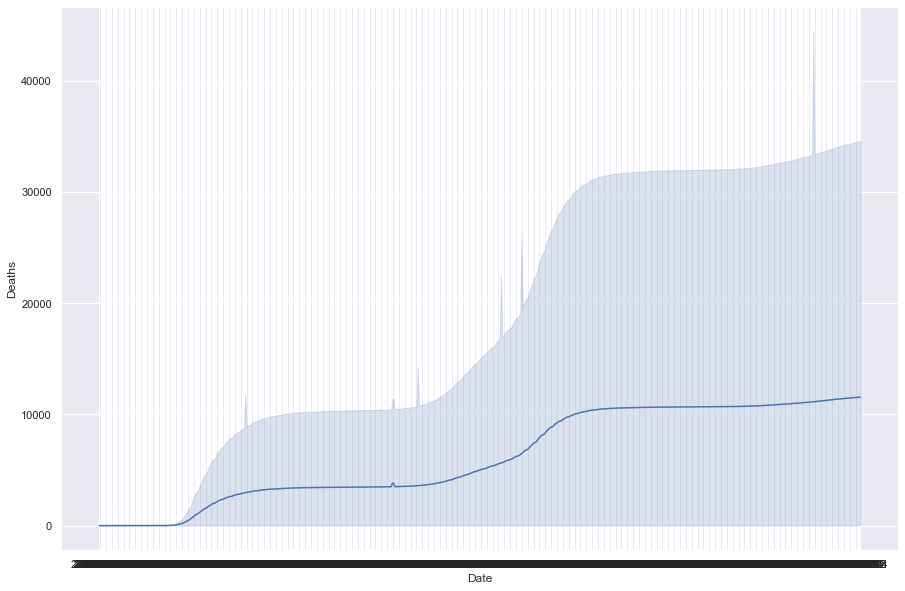

In [48]:
# Create line chart for deaths over time
sns.lineplot(x="Date", y="Deaths", data=covid)

<AxesSubplot:xlabel='Date', ylabel='Cases'>

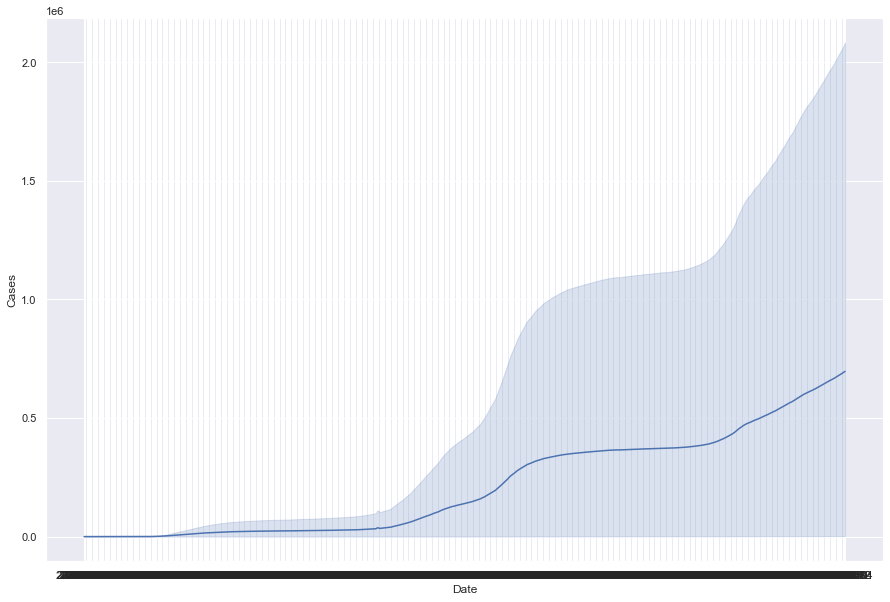

In [49]:
# Create line chart for cases over time
sns.lineplot(x="Date", y="Cases", data=covid)

<AxesSubplot:xlabel='Date', ylabel='Recovered'>

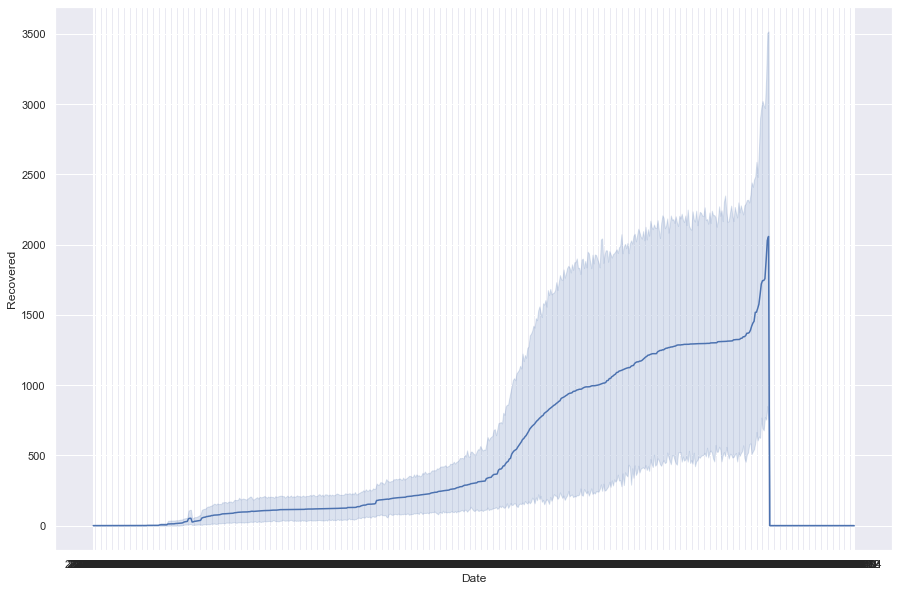

In [50]:
# Create line chart for recovered over time
sns.lineplot(x="Date", y="Recovered", data=covid)

<AxesSubplot:xlabel='Date', ylabel='Hospitalised'>

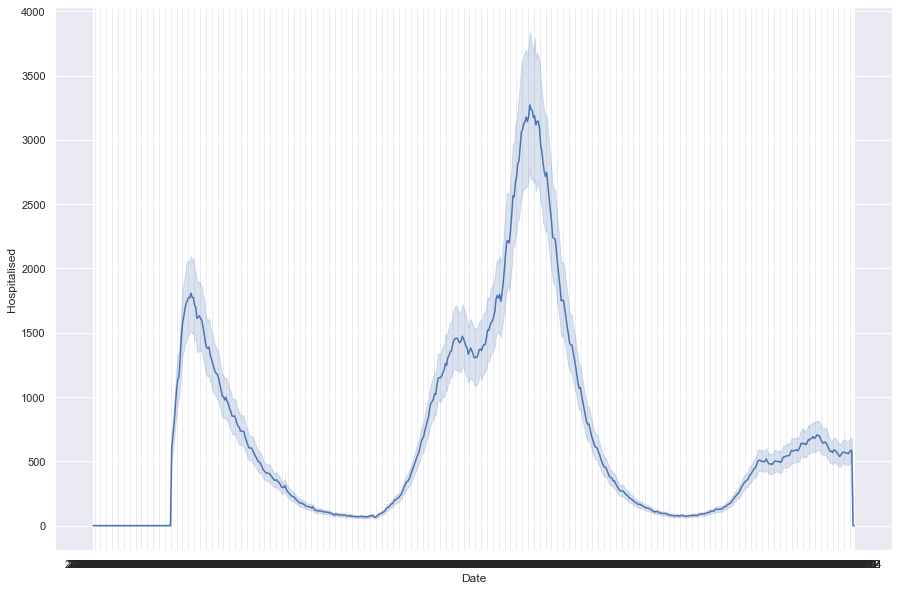

In [51]:
# Create line chart for hospitalised over time
sns.lineplot(x="Date", y="Hospitalised", data=covid)

<AxesSubplot:xlabel='Date', ylabel='Vaccinated'>

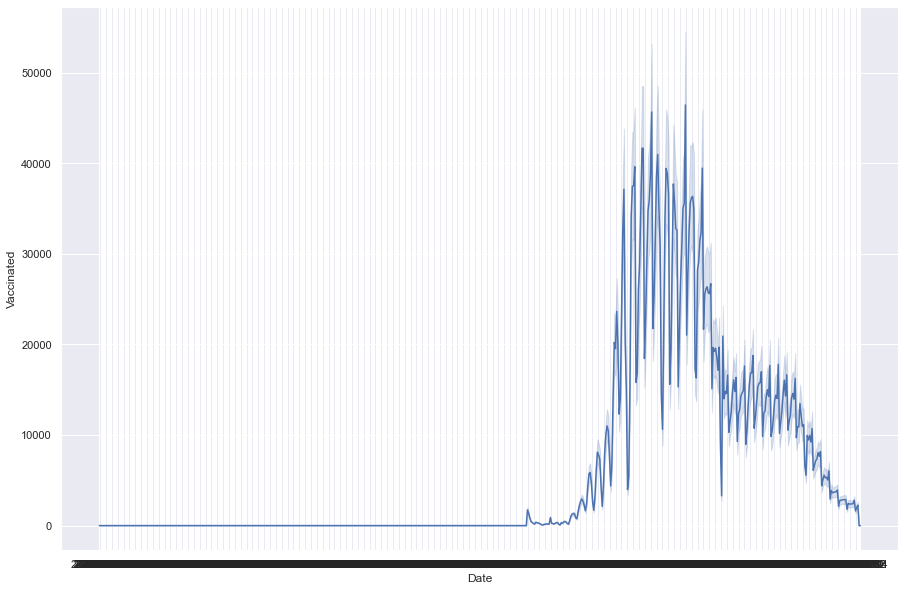

In [52]:
# Create line chart for vaccinated over time
sns.lineplot(x="Date", y="Vaccinated", data=covid)

<AxesSubplot:xlabel='Date', ylabel='First Dose'>

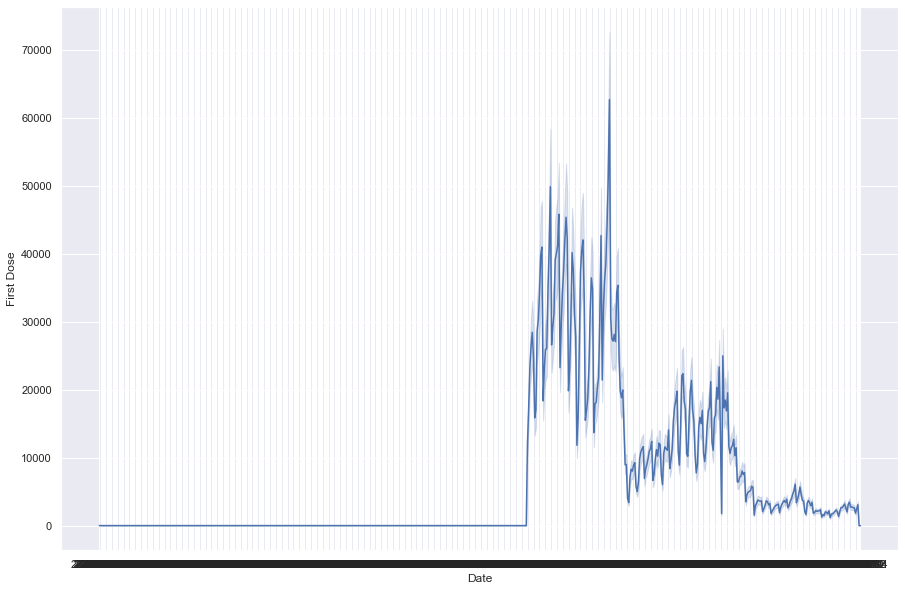

In [53]:
# Create line chart for first dose over time
sns.lineplot(x="Date", y="First Dose", data=covid)

<AxesSubplot:xlabel='Date', ylabel='Second Dose'>

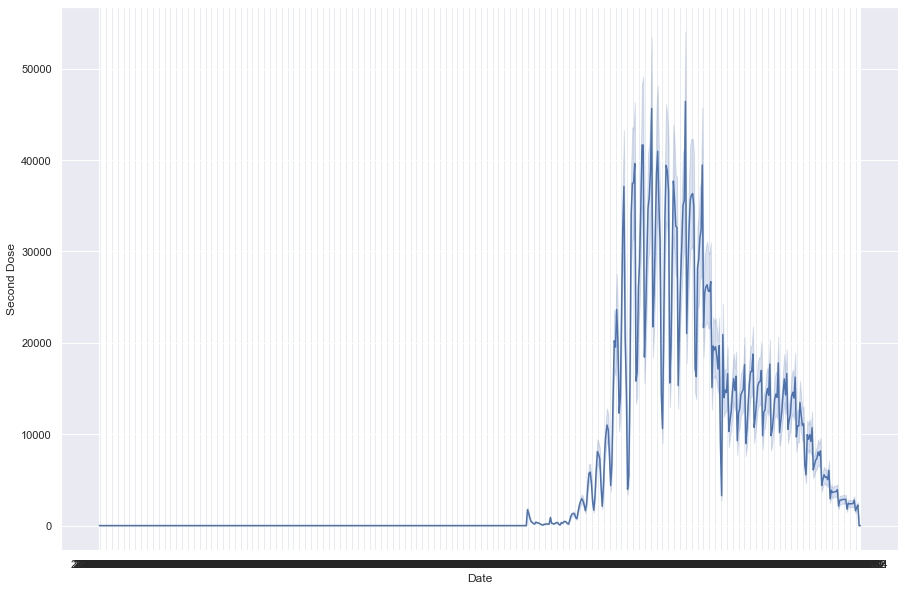

In [54]:
# Create line chart for second dose over time
sns.lineplot(x="Date", y="Second Dose", data=covid)

# Explore behaviour over time - Gibraltar

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

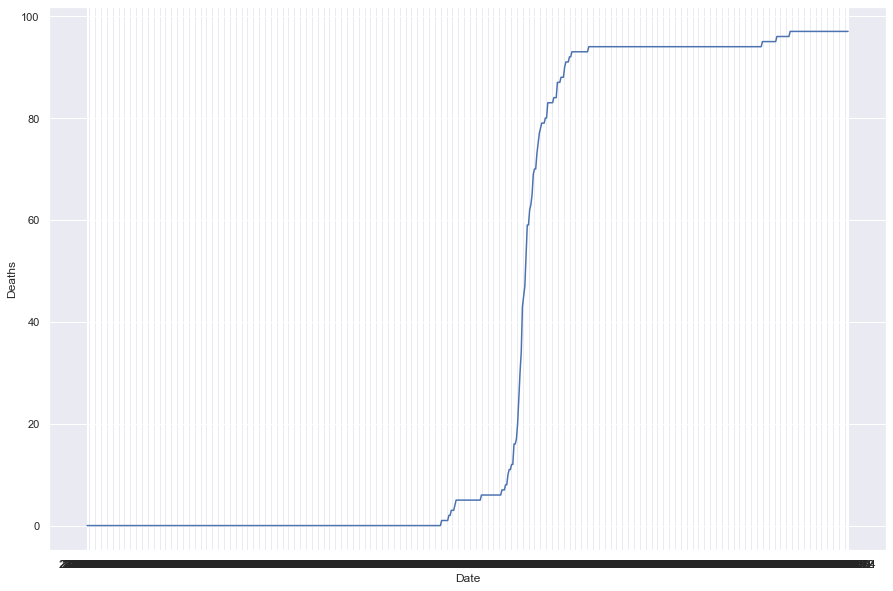

In [41]:
# Create line chart for deaths over time
sns.lineplot(x="Date", y="Deaths", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='Cases'>

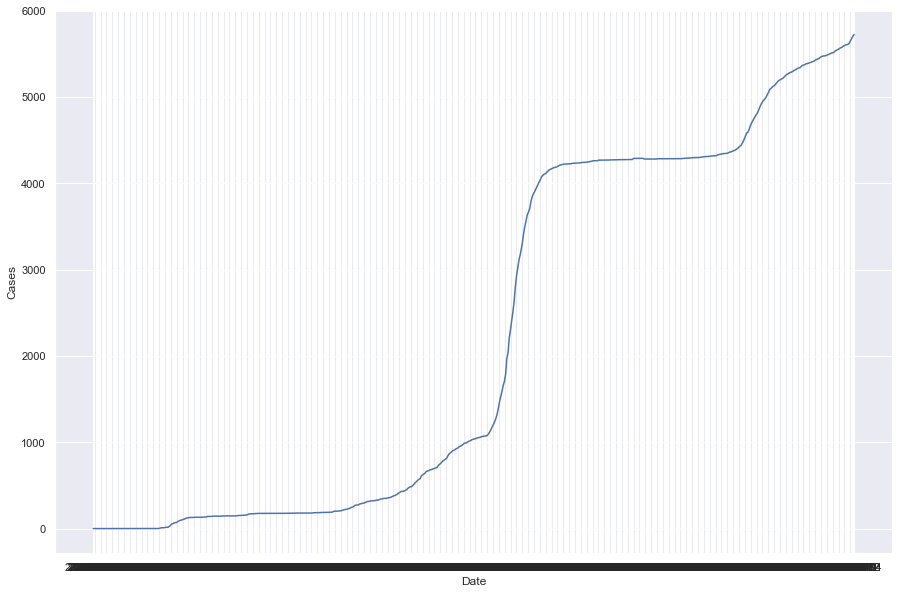

In [42]:
# Create line chart for cases over time
sns.lineplot(x="Date", y="Cases", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='Recovered'>

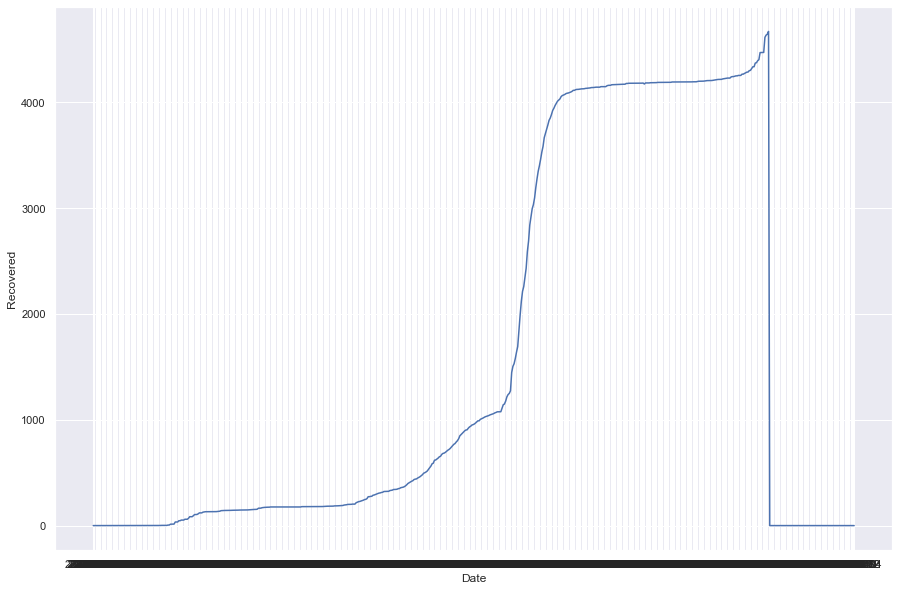

In [43]:
# Create line chart for recovered over time
sns.lineplot(x="Date", y="Recovered", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='Hospitalised'>

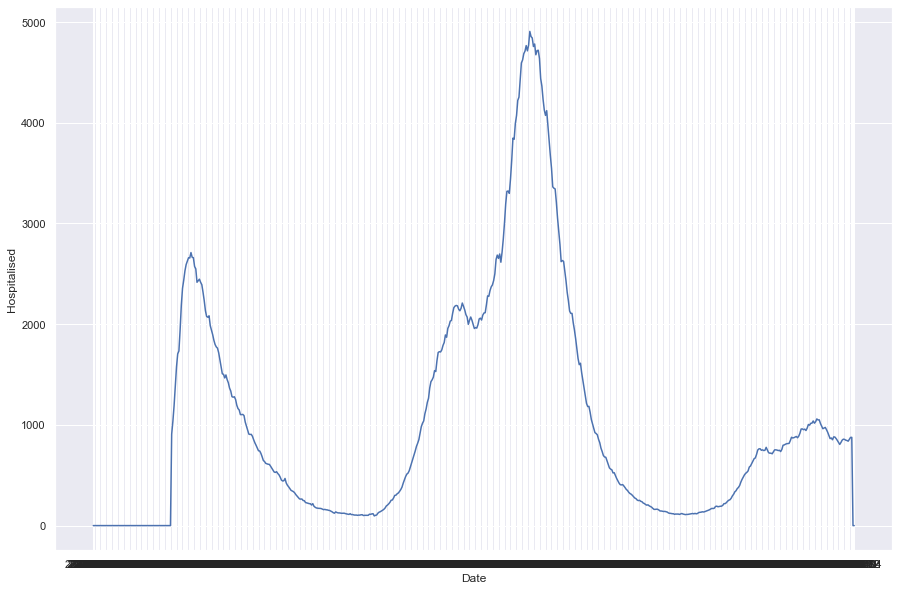

In [44]:
# Create line chart for hospitalised over time
sns.lineplot(x="Date", y="Hospitalised", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='Vaccinated'>

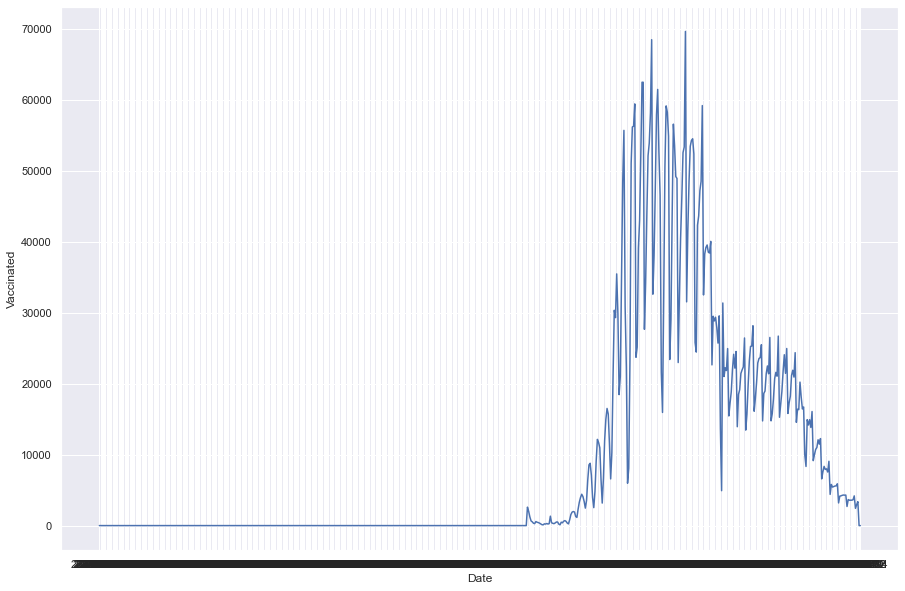

In [45]:
# Create line chart for vaccinated over time
sns.lineplot(x="Date", y="Vaccinated", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='First Dose'>

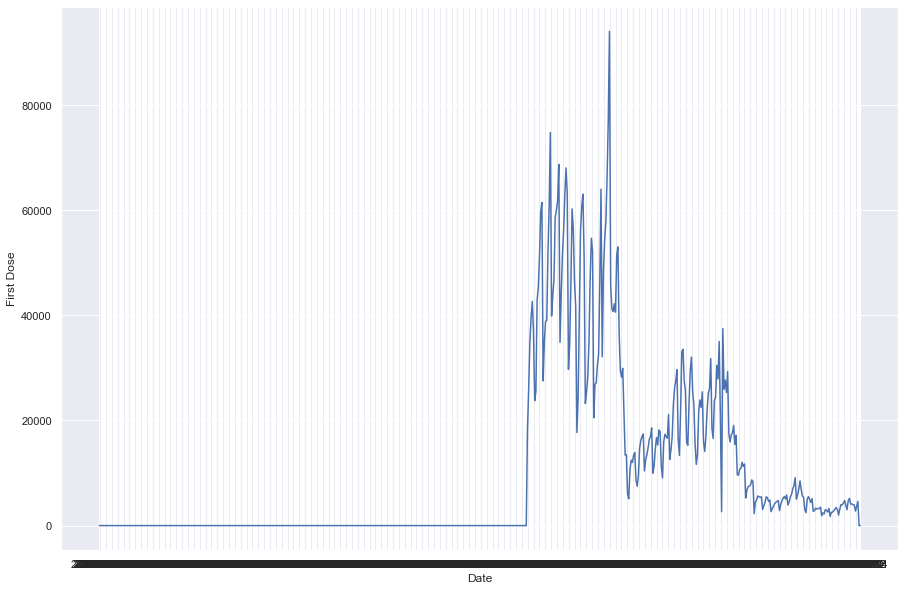

In [46]:
# Create line chart for first dose over time
sns.lineplot(x="Date", y="First Dose", data=gibraltar)

<AxesSubplot:xlabel='Date', ylabel='Second Dose'>

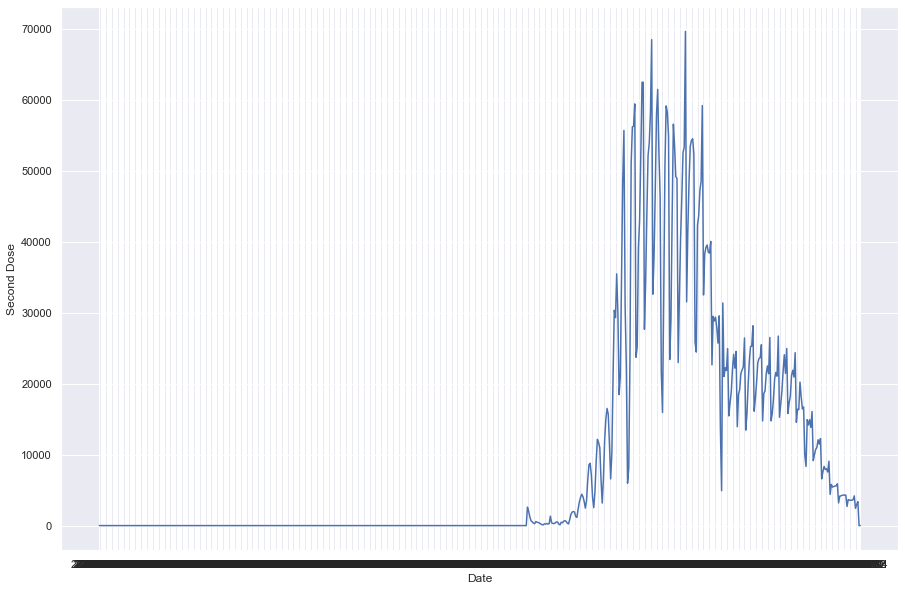

In [47]:
# Create line chart for second dose over time
sns.lineplot(x="Date", y="Second Dose", data=gibraltar)

#### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

It is very important to explore the data. In any givene scenario, we may encounter missing and messy data. In addition, sometime we can't identify misssing values or data quality issues until after we have imported the data. Overlooking these data quality issues can result in incorrect results with significant negative consequences.

It is also important to look at trends over time rather than relying on total numbers alone. Looking at trends allows us to gain additional insights on how the data has behaved over time and can even help us make predictions on what might happen next.

### 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [ ]:
# Join the DataFrames as covid where you merge cov and vac

In [ ]:
# Explore the new DataFrame

In [ ]:
# Fix the date column data type

In [ ]:
# Clean up / drop unnecessary columns 

In [ ]:
# Groupby and calculate difference between first and second dose

In [ ]:
# Groupby and calculate difference between first and second dose over time

#### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Assignment 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

#### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

In [ ]:
# Absolute numbers

In [ ]:
# Relative numbers (%)

In [ ]:
# Sort and display

In [ ]:
# Visualise

In [ ]:
# Let's smooth out the data by looking at monthly figures

In [ ]:
# Other features evaluated (data preparation, output and plots)

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

### 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

#### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

In [ ]:
# Import the tweet dataset (`tweets_2.csv`)


In [ ]:
# Explore the data: info(), head()


In [ ]:
# Explore the structure, count the tweets, get the elements of interest


In [ ]:
# Create a dataframe with the text only


In [ ]:
# Loop through the messages and build a list of values containing the #-symbol


In [ ]:
# Filter and sort


In [ ]:
# Plot


#### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

In [ ]:
# You can copy and paste the relevant code cells from the provided template here.

#### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. We have covered everything from a data ethics standpoint, correct? There’s nothing else we need to implement from a data ethics perspective, right?